In [1]:
#### Data Analysis - 
# Version 2
## 1/26/25
## 18:45

In [2]:
# Importing Modules

# Importing Sys
import sys

# Importing OS
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

# Now you can use absolute imports
from d497_helpers import folder_manager as fm, archive_module, checkpoint_helper as CheckPoint, database_helper as db_tool, config, import_dataframe

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Seaborn
import seaborn as sns

# Itertools
import itertools

# MatplotLib 
import matplotlib.pyplot as plt

# Data Analysis: 

## Is there any correlation between UFO Sightings and U.S. Births? 

In [3]:
# Importing cvs and pickle using my new import dataframe tool
import_cdc_data_main_csv, import_cdc_data_main_pickle = import_dataframe.import_dataframe("cdc_data", "cleaned", "cdc_data_main_df")

In [4]:
# Keeping pickle
cdc_data_main_df = import_cdc_data_main_pickle.copy()

In [5]:
# Cleanup
del import_cdc_data_main_csv
del import_cdc_data_main_pickle

In [6]:
# getting info
cdc_data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187620 entries, 0 to 187619
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year_code       187620 non-null  object
 1   month_code      187620 non-null  object
 2   state           187620 non-null  object
 3   state_code      187620 non-null  object
 4   state_fipcode   187620 non-null  object
 5   county          187620 non-null  object
 6   county_fipcode  187620 non-null  object
 7   fips_five       187620 non-null  object
 8   births          187620 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 12.9+ MB


In [7]:
# Visual inspection
cdc_data_main_df.head()

,year_code,month_code,state,state_code,state_fipcode,county,county_fipcode,fips_five,births
0,1995,1,Alabama,AL,01,Calhoun County,C015,01015,464
1,1995,1,Alabama,AL,01,Jefferson County,C073,01073,1118
2,1995,1,Alabama,AL,01,Madison County,C089,01089,658
3,1995,1,Alabama,AL,01,Mobile County,C097,01097,845
4,1995,1,Alabama,AL,01,Montgomery County,C101,01101,631


In [8]:
# Initializes Database Engine and Session For SQL
db_tool.initialize_engine()
db_tool.initialize_session()

In [9]:
# sql query to get aggregated ufo data from the ufo_data_agg table in the database

pull_ufo_agg_data_sql_query = '''

    SELECT
        *
        FROM
            ufo_data_agg

'''

In [10]:
# Exporting sql table data to dataframe
ufo_data_agg_df = db_tool.export_df_from_sql(pull_ufo_agg_data_sql_query, "ufo_data_agg")

2025-02-01 00:33:55,707 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-01 00:33:55,709 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("

    SELECT
        *
        FROM
            ufo_data_agg

")
2025-02-01 00:33:55,710 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-01 00:33:55,712 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("

    SELECT
        *
        FROM
            ufo_data_agg

")
2025-02-01 00:33:55,712 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-01 00:33:55,713 INFO sqlalchemy.engine.Engine 

    SELECT
        *
        FROM
            ufo_data_agg


2025-02-01 00:33:55,714 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-01 00:33:55,961 INFO sqlalchemy.engine.Engine COMMIT


In [11]:
# getting info
ufo_data_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83855 entries, 0 to 83854
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_code       83855 non-null  int64 
 1   month_code      83855 non-null  int64 
 2   state_fipcode   83855 non-null  object
 3   county_fipcode  83855 non-null  object
 4   fips_five       83855 non-null  object
 5   sightings       83855 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ MB


In [12]:
# visual Inspection
ufo_data_agg_df.head()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings
0,1994,1,06,C037,06037,4
1,1994,1,06,C053,06053,1
2,1994,1,06,C089,06089,1
3,1994,1,06,C111,06111,1
4,1994,1,08,C117,08117,1


In [13]:
# Converting year code and month code data in the cdc dataframe to int type
cdc_data_main_df['year_code'] = cdc_data_main_df['year_code'].astype(int)
cdc_data_main_df['month_code'] = cdc_data_main_df['month_code'].astype(int)

In [14]:
# getting info
cdc_data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187620 entries, 0 to 187619
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year_code       187620 non-null  int64 
 1   month_code      187620 non-null  int64 
 2   state           187620 non-null  object
 3   state_code      187620 non-null  object
 4   state_fipcode   187620 non-null  object
 5   county          187620 non-null  object
 6   county_fipcode  187620 non-null  object
 7   fips_five       187620 non-null  object
 8   births          187620 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


In [15]:
# merging ufo aggregated data with cdc data
merged_df = cdc_data_main_df.merge(ufo_data_agg_df, on=['year_code', 'month_code', 'state_fipcode', 'county_fipcode', 'fips_five'], how="inner")

In [16]:
# getting info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48018 entries, 0 to 48017
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_code       48018 non-null  int64 
 1   month_code      48018 non-null  int64 
 2   state           48018 non-null  object
 3   state_code      48018 non-null  object
 4   state_fipcode   48018 non-null  object
 5   county          48018 non-null  object
 6   county_fipcode  48018 non-null  object
 7   fips_five       48018 non-null  object
 8   births          48018 non-null  int64 
 9   sightings       48018 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 3.7+ MB


In [17]:
# Visual inspection
merged_df.sample(10)

,year_code,month_code,state,state_code,state_fipcode,county,county_fipcode,fips_five,births,sightings
42263,2020,9,Missouri,MO,29,Boone County,C019,29019,418,1
12407,2006,12,Ohio,OH,39,Summit County,C153,39153,648,1
8153,2004,2,Indiana,IN,18,Monroe County,C105,18105,272,1
36063,2017,9,South Carolina,SC,45,Spartanburg County,C083,45083,443,2
10070,2005,6,Florida,FL,12,Duval County,C031,12031,1088,3
28985,2014,9,California,CA,06,Tulare County,C107,06107,740,3
29464,2014,10,Utah,UT,49,Salt Lake County,C035,49035,1652,1
34482,2016,12,Florida,FL,12,Clay County,C019,12019,230,1
34222,2016,10,Texas,TX,48,Collin County,C085,48085,1074,3
36455,2017,12,California,CA,06,Sonoma County,C097,06097,368,3


In [18]:
# Generating correlation results of the merged datat's birth and sightings values
correlation = merged_df[['births', 'sightings']].corr()

In [19]:
# Print correclation
correlation

,births,sightings
births,1.000000,0.439385
sightings,0.439385,1.000000


In [20]:
# Exporting Correlation to Results
file_name = "pearson_correlation_results.pkl"
folder_path = config.global_results_folder_path
file_path = folder_path + "/" + file_name

correlation.to_pickle(file_path)

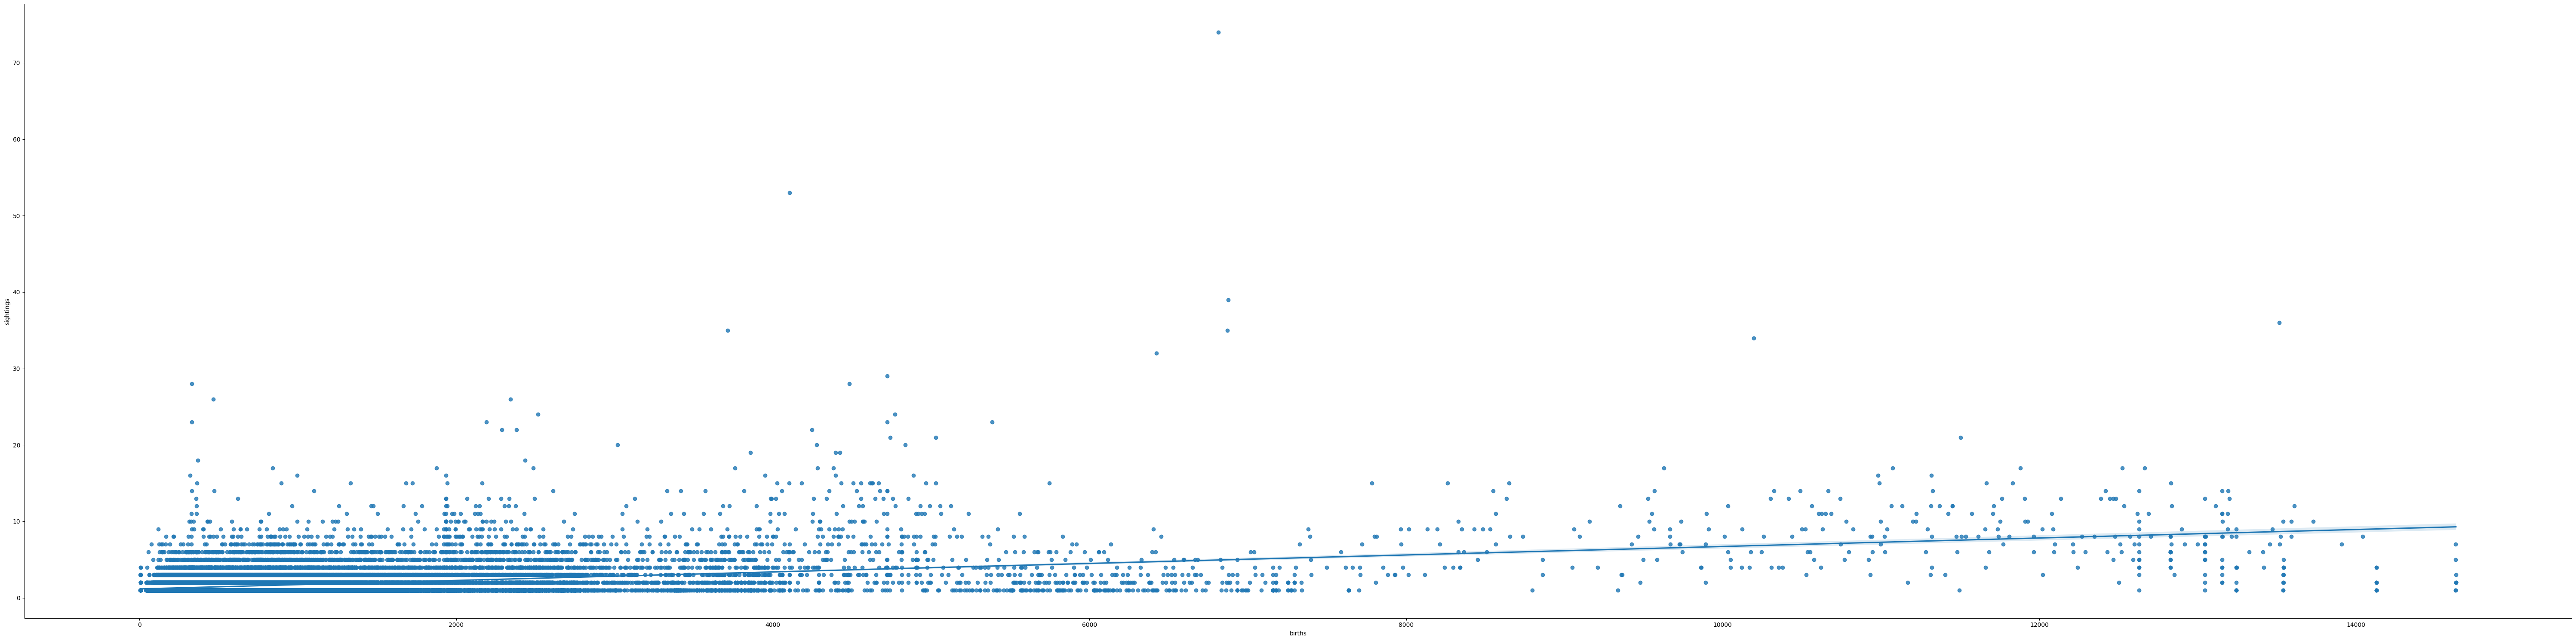

In [21]:
# Plot correlation
sns.lmplot(data=merged_df, x='births', y='sightings', height=15, aspect=4)

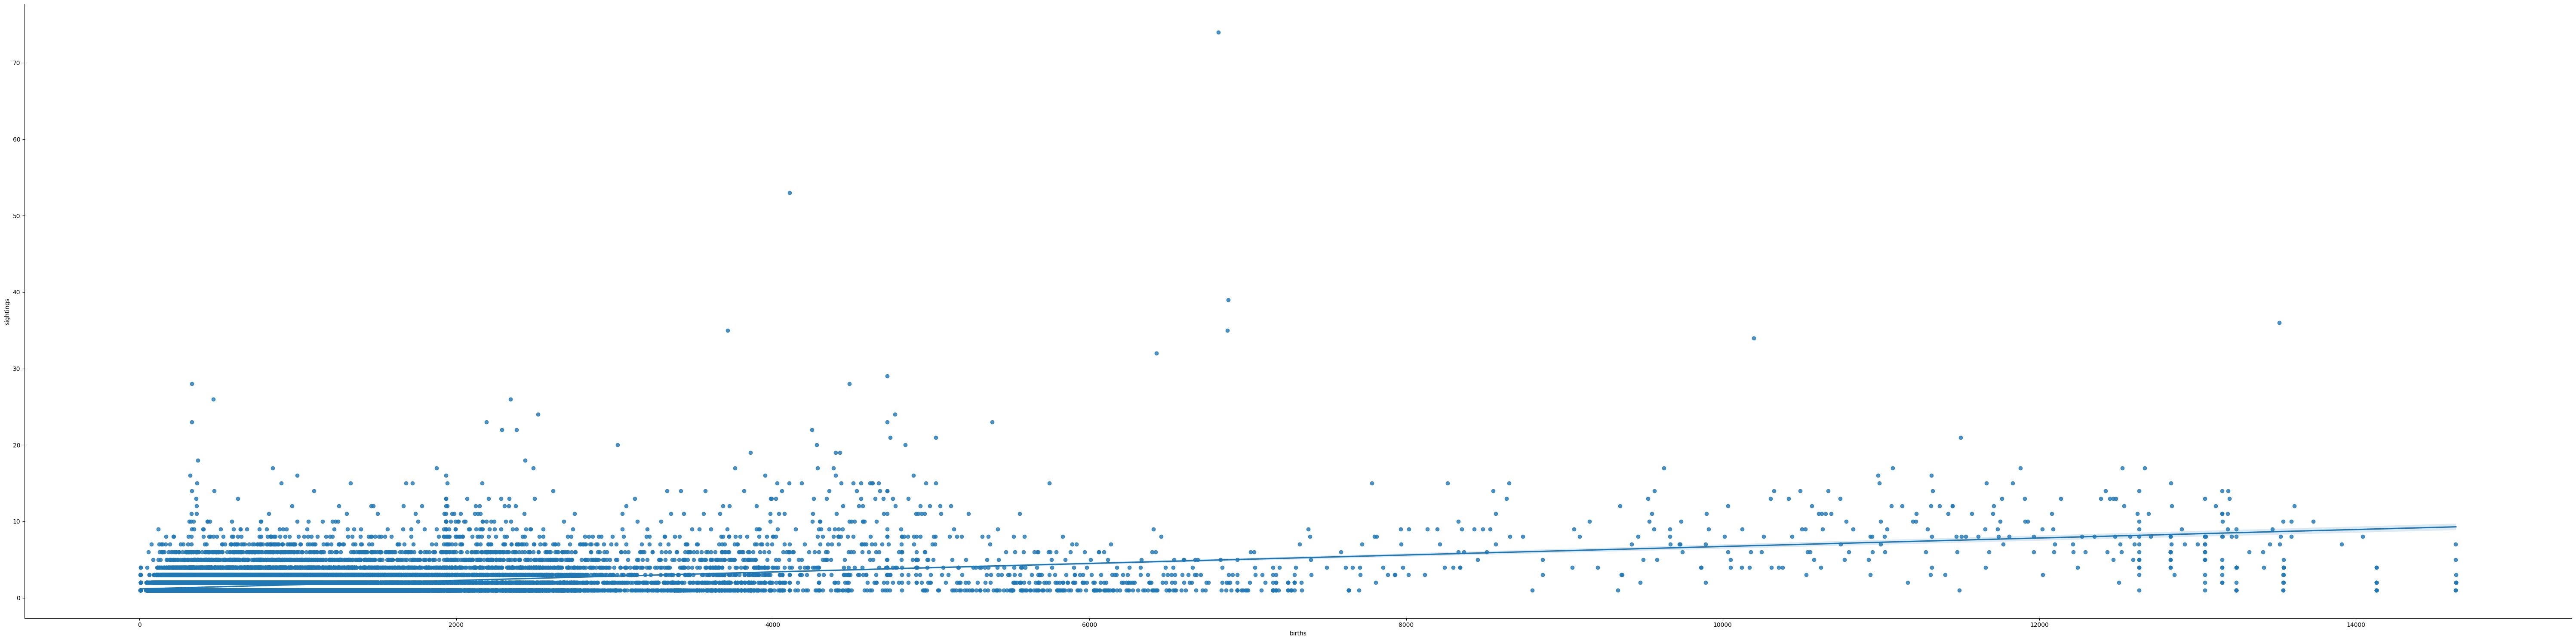

In [22]:
# Exporoting Plot as an image. 
save_file_name = "pearson_correlation_scatter_plot.png"
save_folder_path = config.global_results_folder_path 
save_file_path = save_folder_path + "/" + save_file_name

scatter_plot = sns.lmplot(data=merged_df, x='births', y='sightings', height=15, aspect=4)
scatter_plot.savefig(save_file_path, dpi=300, bbox_inches="tight")


What we are able to see here is there that there is a moderate positive correlation between the number of births and UFO sightings over the dataset.

Let's try seeing if we can identify further correlations between pairs in the dataset's variables. We will do this by swithching to the Spearman correlation method. 

In [27]:
# Creating a new subset datframe from the merged dataframe wihtout the county_fipcode column for this next correlation method. 
merged_df_subset = merged_df.drop(columns=['state', 'state_code', 'county', 'county_fipcode'])

In [28]:
# Performing spearman correlation on the new subset dataframe
spearman_correlation = merged_df_subset.corr(method='spearman')

In [29]:
# printing correclation results 
spearman_correlation

,year_code,month_code,state_fipcode,fips_five,births,sightings
year_code,1.000000,-0.025169,0.018940,0.019146,-0.147695,0.055797
month_code,-0.025169,1.000000,0.014394,0.014160,0.004223,0.041701
state_fipcode,0.018940,0.014394,1.000000,0.998409,-0.076527,-0.099907
fips_five,0.019146,0.014160,0.998409,1.000000,-0.079419,-0.102137
births,-0.147695,0.004223,-0.076527,-0.079419,1.000000,0.288086
sightings,0.055797,0.041701,-0.099907,-0.102137,0.288086,1.000000


In [30]:
# Exporting Correlation to Results
file_name = "spearman_correlation_results.pkl"
folder_path = config.global_results_folder_path
file_path = folder_path + "/" + file_name

spearman_correlation.to_pickle(file_path)

### Make a combination dataframe for all possible dates and states. 

In [31]:
get_fips_data_sql_query = """

    SELECT 
        state_fipcode,
        county_fipcode,
        fips_five
    FROM
        fips_data
            WHERE multi_county_flag == "0"
"""

In [32]:
fips_results = db_tool.execute_query(get_fips_data_sql_query)

2025-02-01 00:35:01,169 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-01 00:35:01,170 INFO sqlalchemy.engine.Engine 

    SELECT 
        state_fipcode,
        county_fipcode,
        fips_five
    FROM
        fips_data
            WHERE multi_county_flag == "0"

2025-02-01 00:35:01,171 INFO sqlalchemy.engine.Engine [generated in 0.00102s] ()
2025-02-01 00:35:01,226 INFO sqlalchemy.engine.Engine COMMIT


In [33]:
fips_data = pd.DataFrame.from_records(fips_results)

In [34]:
fips_data.columns = ['state_fipcode', 'county_fipcode', 'fips_five']

In [35]:
fips_data.sample()

,state_fipcode,county_fipcode,fips_five
31074,47,C091,47091


In [36]:
fips_five_list = fips_data['fips_five'].unique()

In [37]:
fips_five_list

array(['01001', '01003', '01005', ..., '56041', '56043', '56045'],
      shape=(3139,), dtype=object)

In [38]:
# Define the range of years and months
years = list(range(1995, 2024)) # 1994 to 2023 inclusive
months = list(range(1, 13))      # 1 to 12 inclusive

In [39]:
all_combinations = pd.DataFrame(
    itertools.product(years, months, fips_five_list),
    columns=['year_code', 'month_code', 'fips_five']
)


In [40]:
all_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   year_code   1092372 non-null  int64 
 1   month_code  1092372 non-null  int64 
 2   fips_five   1092372 non-null  object
dtypes: int64(2), object(1)
memory usage: 25.0+ MB


In [41]:
all_combinations.head(25)

,year_code,month_code,fips_five
0,1995,1,01001
1,1995,1,01003
2,1995,1,01005
3,1995,1,01007
4,1995,1,01009
5,1995,1,01011
6,1995,1,01013
7,1995,1,01015
8,1995,1,01017
9,1995,1,01019


In [42]:
all_combinations['state_fipcode'] = all_combinations['fips_five'].str.slice(0,2)
all_combinations['county_fipcode'] = "C" + all_combinations['fips_five'].str.slice(-3)

In [43]:
all_combinations.insert(4, 'fips_five', all_combinations.pop('fips_five'))

In [44]:
time_series_ufo_df = all_combinations.merge(ufo_data_agg_df, on=['year_code','month_code', 'state_fipcode','county_fipcode','fips_five'], how="left", indicator=True)

In [45]:
time_series_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   sightings       76779 non-null    float64 
 6   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 51.0+ MB


In [46]:
time_series_ufo_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings,_merge
788685,2015,12,19,C021,19021,NaN,left_only
820281,2016,10,21,C025,21025,NaN,left_only
1071905,2023,6,29,C057,29057,NaN,left_only
692422,2013,5,36,C035,36035,NaN,left_only
167029,1999,6,17,C143,17143,NaN,left_only
276928,2002,5,18,C005,18005,NaN,left_only
796747,2016,2,48,C121,48121,NaN,left_only
274953,2002,4,36,C071,36071,NaN,left_only
683382,2013,2,41,C029,41029,NaN,left_only
68064,1996,10,40,C035,40035,NaN,left_only


In [47]:
time_series_ufo_df['sightings'] = time_series_ufo_df['sightings'].fillna(0)

In [48]:
time_series_ufo_df.sample()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings,_merge
775759,2015,8,13,C087,13087,0.0,left_only


In [49]:
time_series_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   sightings       1092372 non-null  float64 
 6   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 51.0+ MB


In [50]:
time_series_ufo_df = time_series_ufo_df.drop(columns=['_merge'])

In [51]:
time_series_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   year_code       1092372 non-null  int64  
 1   month_code      1092372 non-null  int64  
 2   state_fipcode   1092372 non-null  object 
 3   county_fipcode  1092372 non-null  object 
 4   fips_five       1092372 non-null  object 
 5   sightings       1092372 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 50.0+ MB


In [52]:
time_series_births_df = all_combinations.merge(cdc_data_main_df, on=['year_code', 'month_code','state_fipcode','county_fipcode','fips_five'], how='left', indicator=True)

In [53]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   state           186924 non-null   object  
 6   state_code      186924 non-null   object  
 7   county          186924 non-null   object  
 8   births          186924 non-null   float64 
 9   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(6)
memory usage: 76.0+ MB


In [54]:
time_series_births_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,state,state_code,county,births,_merge
837457,2017,3,47,C119,47119,NaN,NaN,NaN,NaN,left_only
306787,2003,2,42,C127,42127,NaN,NaN,NaN,NaN,left_only
200439,2000,4,48,C325,48325,NaN,NaN,NaN,NaN,left_only
1007338,2021,9,51,C079,51079,NaN,NaN,NaN,NaN,left_only
600022,2010,12,13,C183,13183,NaN,NaN,NaN,NaN,left_only
757014,2015,2,13,C269,13269,NaN,NaN,NaN,NaN,left_only
226906,2001,1,20,C027,20027,NaN,NaN,NaN,NaN,left_only
767531,2015,5,30,C045,30045,NaN,NaN,NaN,NaN,left_only
492782,2008,1,55,C107,55107,NaN,NaN,NaN,NaN,left_only
710356,2013,11,20,C115,20115,NaN,NaN,NaN,NaN,left_only


In [55]:
time_series_births_df['births'] = time_series_births_df['births'].fillna(0)

In [56]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   state           186924 non-null   object  
 6   state_code      186924 non-null   object  
 7   county          186924 non-null   object  
 8   births          1092372 non-null  float64 
 9   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(6)
memory usage: 76.0+ MB


In [57]:
time_series_births_df = time_series_births_df.drop(columns='_merge')

In [58]:
time_series_births_df['births'] = time_series_births_df['births'].astype(int)

In [59]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   year_code       1092372 non-null  int64 
 1   month_code      1092372 non-null  int64 
 2   state_fipcode   1092372 non-null  object
 3   county_fipcode  1092372 non-null  object
 4   fips_five       1092372 non-null  object
 5   state           186924 non-null   object
 6   state_code      186924 non-null   object
 7   county          186924 non-null   object
 8   births          1092372 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 75.0+ MB


In [60]:
time_series_births_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,state,state_code,county,births
167233,1999,6,19,C161,19161,NaN,NaN,NaN,0
1015649,2021,12,32,C019,32019,NaN,NaN,NaN,0
268763,2002,2,37,C123,37123,NaN,NaN,NaN,0
49951,1996,4,51,C095,51095,NaN,NaN,NaN,0
664822,2012,8,47,C139,47139,NaN,NaN,NaN,0
637378,2011,12,05,C105,05105,NaN,NaN,NaN,0
1084289,2023,10,27,C051,27051,NaN,NaN,NaN,0
391801,2005,5,48,C091,48091,NaN,NaN,NaN,0
705599,2013,9,47,C079,47079,NaN,NaN,NaN,0
963985,2020,8,09,C015,09015,Connecticut,CT,Windham County,85


In [61]:
# This process is super slow due to the row by row application. 
# Need to adjust this to a different method. 

#time_series_births_df['date'] = time_series_births_df.apply(lambda row: pd.to_datetime(f"{row.year_code}-{row.month_code}-01"), axis=1)

# found a better way, was going to leave the first to show a growth, but it's just so slow I can't stand it. 

time_series_births_df['date'] = pd.to_datetime(time_series_births_df['year_code'].astype(str) + '-' + time_series_births_df['month_code'].astype(str) + '-01')


In [62]:
# Getting info
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   year_code       1092372 non-null  int64         
 1   month_code      1092372 non-null  int64         
 2   state_fipcode   1092372 non-null  object        
 3   county_fipcode  1092372 non-null  object        
 4   fips_five       1092372 non-null  object        
 5   state           186924 non-null   object        
 6   state_code      186924 non-null   object        
 7   county          186924 non-null   object        
 8   births          1092372 non-null  int64         
 9   date            1092372 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 83.3+ MB


In [63]:
# Visual Inspection
time_series_births_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,state,state_code,county,births,date
22599,1995,8,17,C071,17071,NaN,NaN,NaN,0,1995-08-01
987239,2021,3,30,C001,30001,NaN,NaN,NaN,0,2021-03-01
977894,2020,12,31,C031,31031,NaN,NaN,NaN,0,2020-12-01
773362,2015,7,22,C117,22117,NaN,NaN,NaN,0,2015-07-01
848046,2017,7,13,C271,13271,NaN,NaN,NaN,0,2017-07-01
379902,2005,2,02,C185,02185,NaN,NaN,NaN,0,2005-02-01
819203,2016,9,55,C039,55039,Wisconsin,WI,Fond du Lac County,216,2016-09-01
183355,1999,11,26,C135,26135,NaN,NaN,NaN,0,1999-11-01
272207,2002,3,42,C025,42025,NaN,NaN,NaN,0,2002-03-01
7595,1995,3,27,C017,27017,NaN,NaN,NaN,0,1995-03-01


<Axes: xlabel='date', ylabel='births'>

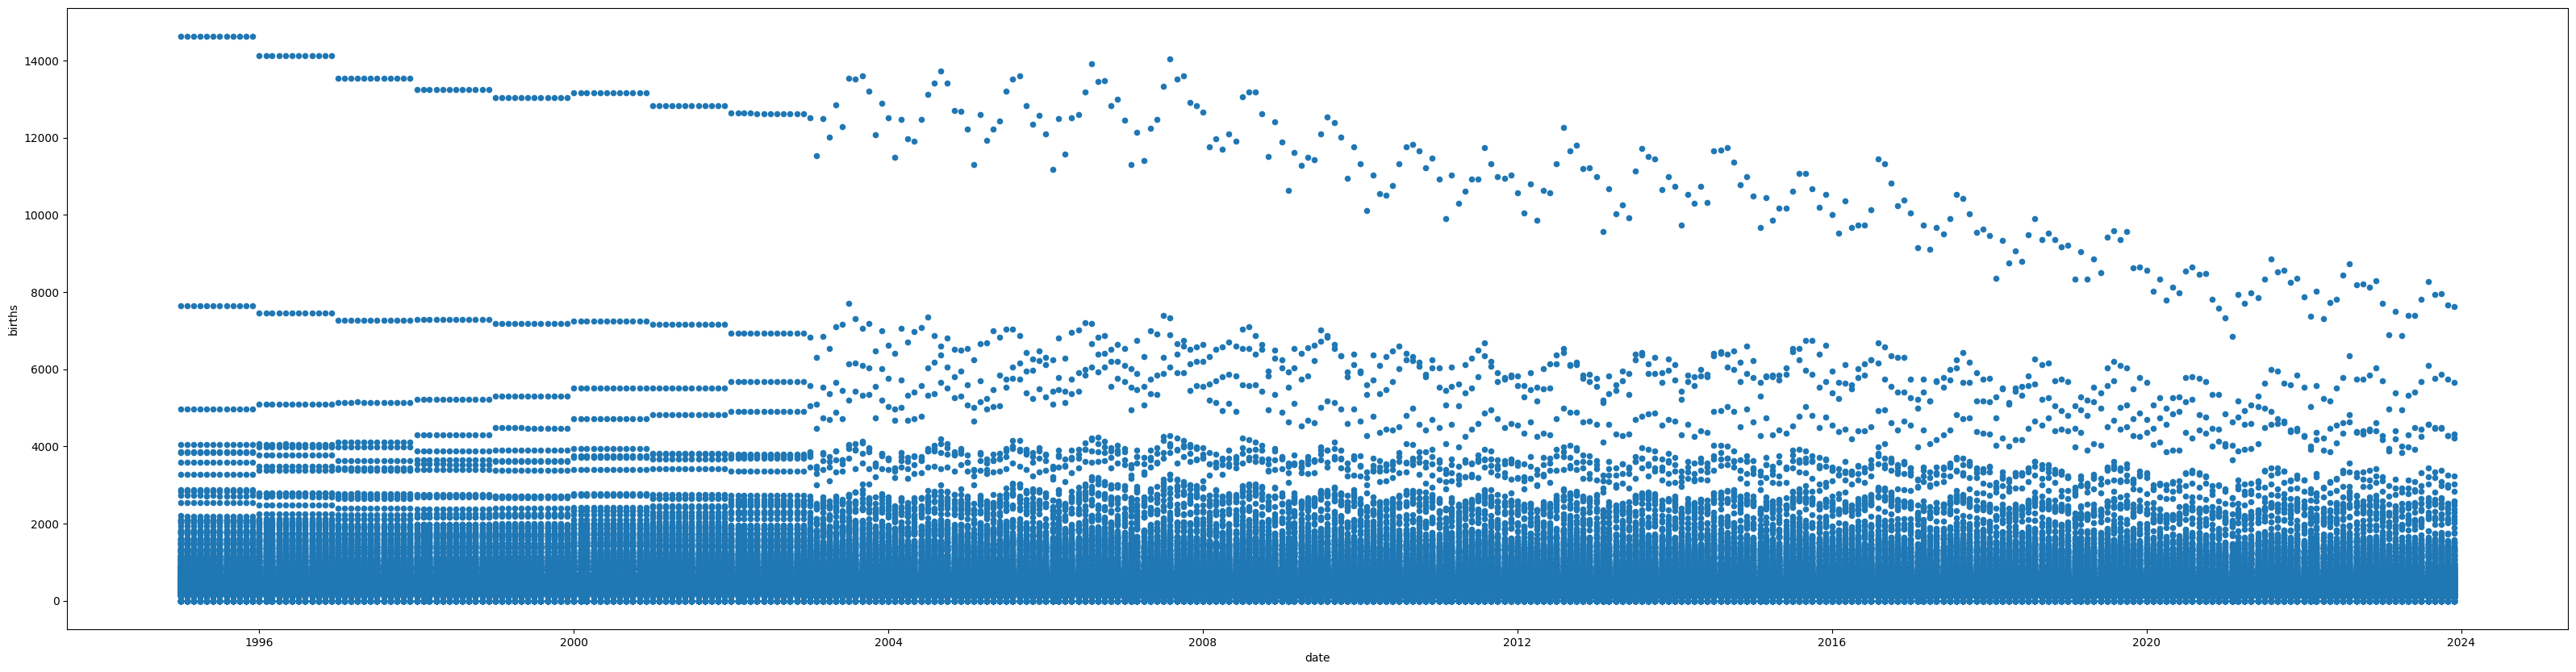

In [64]:
# Creating scatter plot 
time_series_births_df.plot.scatter(figsize=(40, 10), x='date', y='births')

In [65]:
file_name = "time_series_births.png"
folder_path = config.global_results_folder_path
tsb_file_path = folder_path + "/" + file_name

ax = time_series_births_df.plot.scatter(figsize=(40, 10), x='date', y='births')
plt.savefig(tsb_file_path, dpi=300, bbox_inches="tight")
plt.close()

In [69]:
# found a better way to do the the date creationg 

time_series_ufo_df['date'] = pd.to_datetime(time_series_ufo_df['year_code'].astype(str) + '-' + time_series_ufo_df['month_code'].astype(str) + '-01')


# So much faster. 

In [70]:
time_series_ufo_df

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings,date
0,1995,1,01,C001,01001,0.0,1995-01-01
1,1995,1,01,C003,01003,0.0,1995-01-01
2,1995,1,01,C005,01005,0.0,1995-01-01
3,1995,1,01,C007,01007,0.0,1995-01-01
4,1995,1,01,C009,01009,0.0,1995-01-01
...,...,...,...,...,...,...,...
1092367,2023,12,56,C037,56037,0.0,2023-12-01
1092368,2023,12,56,C039,56039,0.0,2023-12-01
1092369,2023,12,56,C041,56041,0.0,2023-12-01
1092370,2023,12,56,C043,56043,0.0,2023-12-01


<Axes: xlabel='date', ylabel='sightings'>

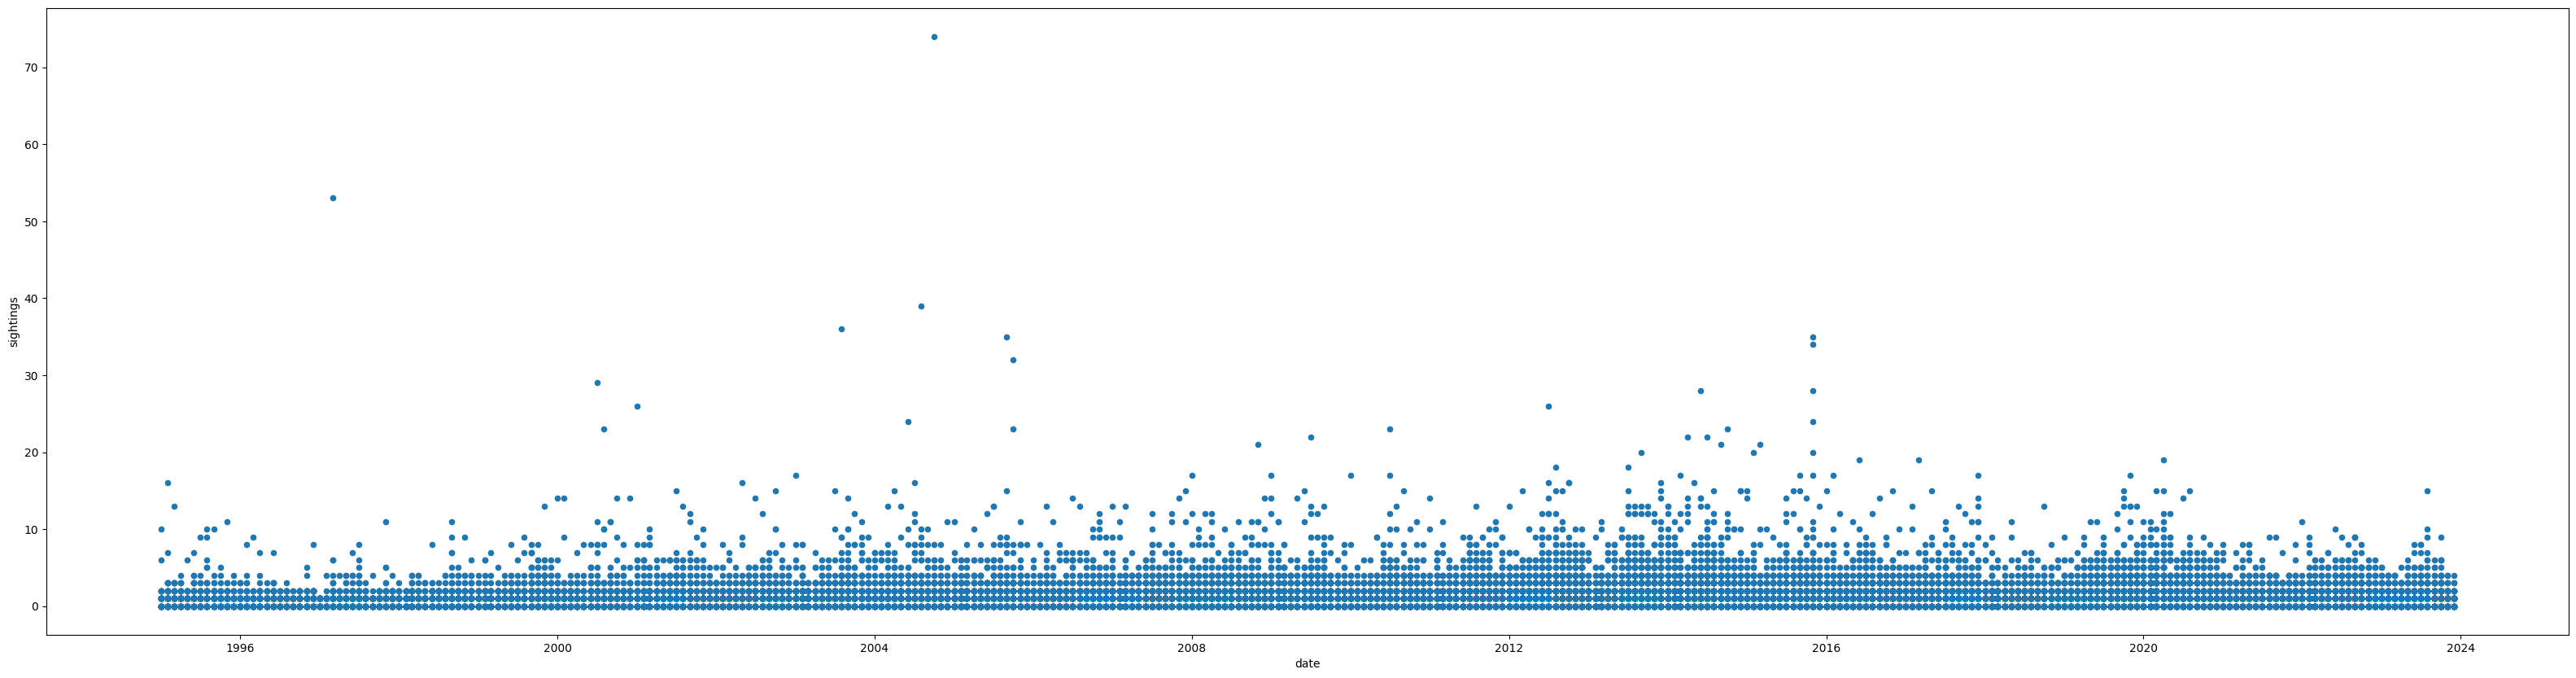

In [71]:
time_series_ufo_df.plot.scatter(figsize=(40, 10), x='date', y='sightings')

In [72]:
file_name = "time_series_ufo.png"
folder_path = config.global_results_folder_path
tsu_file_path = folder_path + "/" + file_name

ax = time_series_ufo_df.plot.scatter(figsize=(40, 10), x='date', y='sightings')
plt.savefig(tsu_file_path, dpi=300, bbox_inches="tight")
plt.close()

In [ ]:
# Probably need to filter these by each individual fips code or do aggregated groupings.

In [73]:
# Define a dictionary for state FIPS codes and regions
regions = {
    'Northeast': ['09', '23', '25', '33', '44', '50', '34', '36', '42'],
    'Midwest': ['18', '17', '26', '39', '55', '19', '20', '27', '29', '31', '38', '46'],
    'South': ['10', '11', '12', '13', '21', '24', '37', '45', '51', '54', '01', '05', '22', '28', '40', '47', '48'],
    'West': ['04', '08', '16', '30', '32', '35', '49', '53', '56', '02', '06', '15']
}

In [74]:
# function to assign proper region to each state entry
def assign_region(fipcode):
    for region, states in regions.items():
        if fipcode in states:
            return region
    return None

In [75]:
# Assign regions with function above
time_series_births_df['region'] = time_series_births_df['state_fipcode'].apply(assign_region)
time_series_ufo_df['region'] = time_series_ufo_df['state_fipcode'].apply(assign_region)

In [76]:
# Aggregate CDC data by region and date
births_by_region = time_series_births_df.groupby(['region', 'date'])['births'].sum().reset_index()

# Aggregate UFO data by region and date
ufo_by_region = time_series_ufo_df.groupby(['region', 'date'])['sightings'].sum().reset_index()

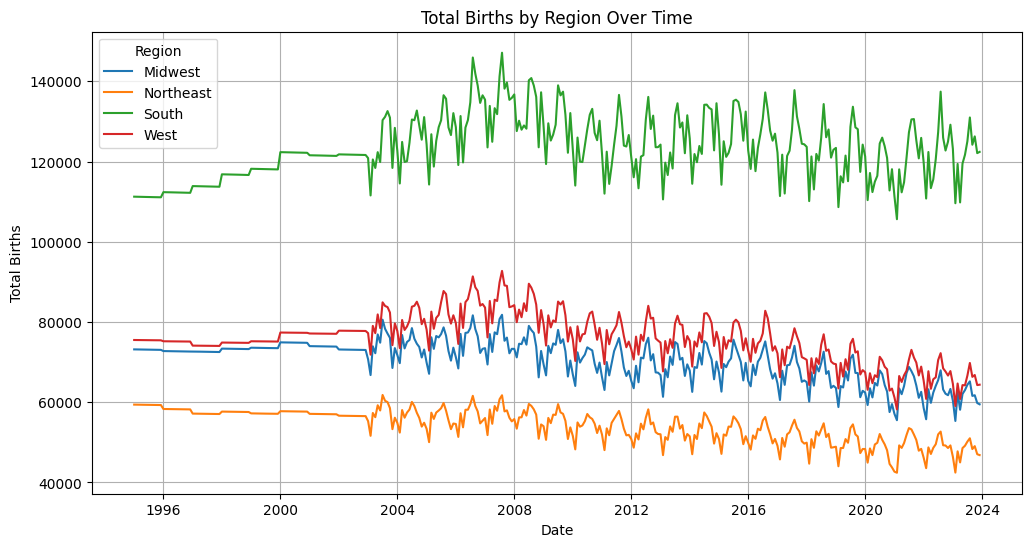

In [77]:
# Create a line plot for births by region
plt.figure(figsize=(12, 6))
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=region)

# Customize the plot
plt.title('Total Births by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [78]:
file_name = "time_series_regional_births.png"
folder_path = config.global_results_folder_path
tsrb_file_path = folder_path + "/" + file_name

plt.figure(figsize=(12, 6))
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=region)

# Customize the plot
plt.title('Total Births by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.legend(title='Region')
plt.grid(True)
plt.savefig(tsrb_file_path, dpi=300, bbox_inches="tight")
plt.close()

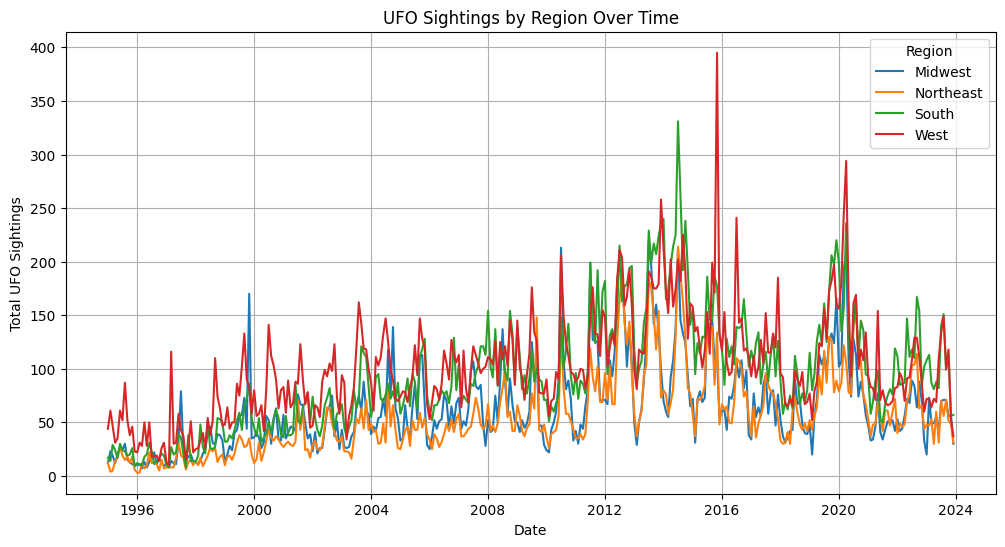

In [79]:
# Create a line plot for UFO sightings by region
plt.figure(figsize=(12, 6))
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=region)

# Customize the plot
plt.title('UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total UFO Sightings')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [80]:
file_name = "time_series_regional_sightings.png"
folder_path = config.global_results_folder_path
tsru_file_path = folder_path + "/" + file_name


# Create a line plot for UFO sightings by region
plt.figure(figsize=(12, 6))
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=region)

# Customize the plot
plt.title('UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total UFO Sightings')
plt.legend(title='Region')
plt.grid(True)
plt.savefig(tsru_file_path, dpi=300, bbox_inches="tight")
plt.close()

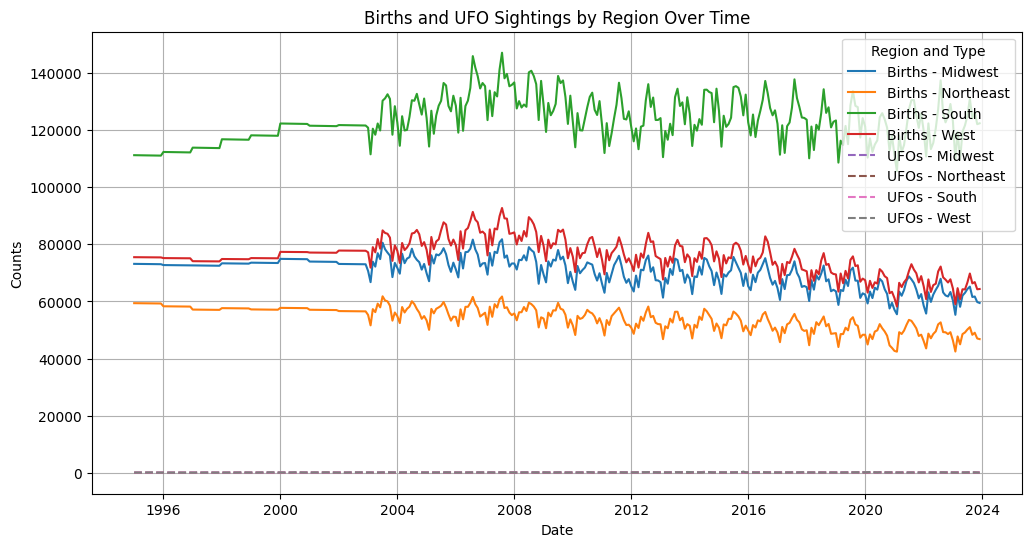

In [81]:
# Overlaid plot for births and UFO sightings
plt.figure(figsize=(12, 6))

# Plot births
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=f'Births - {region}', linestyle='-')

# Plot UFO sightings
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=f'UFOs - {region}', linestyle='--')

# Customize the plot
plt.title('Births and UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')

plt.legend(title='Region and Type')
plt.grid(True)
plt.show()

In [82]:
file_name = "time_series_regional_births_sightings_log_scale.png"
folder_path = config.global_results_folder_path
tsbrls_file_path = folder_path + "/" + file_name


# Overlaid plot for births and UFO sightings
plt.figure(figsize=(12, 6))

# Plot births
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=f'Births - {region}', linestyle='-')

# Plot UFO sightings
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=f'UFOs - {region}', linestyle='--')

# Customize the plot
plt.title('Births and UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend(title='Region and Type')
plt.grid(True)
plt.savefig(tsbrls_file_path, dpi=300, bbox_inches="tight")
plt.close()

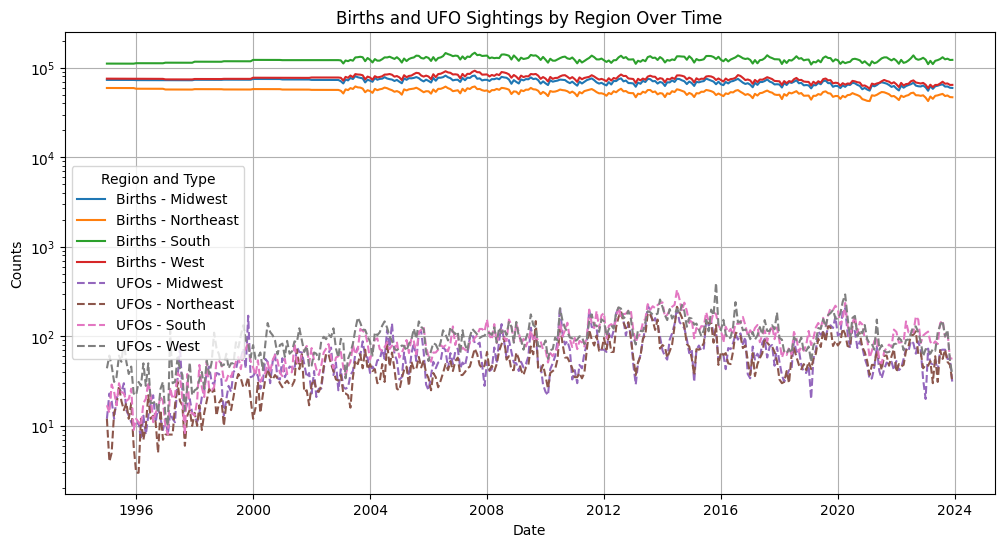

In [83]:
# Overlaid plot for births and UFO sightings
plt.figure(figsize=(12, 6))

# Plot births
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=f'Births - {region}', linestyle='-')

# Plot UFO sightings
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=f'UFOs - {region}', linestyle='--')

# Customize the plot
plt.title('Births and UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend(title='Region and Type')
plt.grid(True)
plt.show()

In [84]:
# Plots with data grouped by month

In [85]:
# For CDC birth data
monthly_births_time_series = time_series_births_df.groupby(time_series_births_df['date'].dt.to_period('M'))['births'].sum().reset_index()
# Convert period back to datetime
monthly_births_time_series['date'] = monthly_births_time_series['date'].dt.to_timestamp()

# For UFO data
monthly_ufo_time_series = time_series_ufo_df.groupby(time_series_ufo_df['date'].dt.to_period('M'))['sightings'].sum().reset_index()
# Convert period back to datetime
monthly_ufo_time_series['date'] = monthly_ufo_time_series['date'].dt.to_timestamp()

In [86]:
# Group by Year

In [87]:
# For CDC birth data
yearly_births_time_series = time_series_births_df.groupby(time_series_births_df['date'].dt.to_period('Y'))['births'].sum().reset_index()

# Convert period back to datetime
yearly_births_time_series['date'] = yearly_births_time_series['date'].dt.to_timestamp()

# For UFO data
yearly_ufo_time_series = time_series_ufo_df.groupby(time_series_ufo_df['date'].dt.to_period('Y'))['sightings'].sum().reset_index()

# Convert period back to datetime
yearly_ufo_time_series['date'] = yearly_ufo_time_series['date'].dt.to_timestamp()

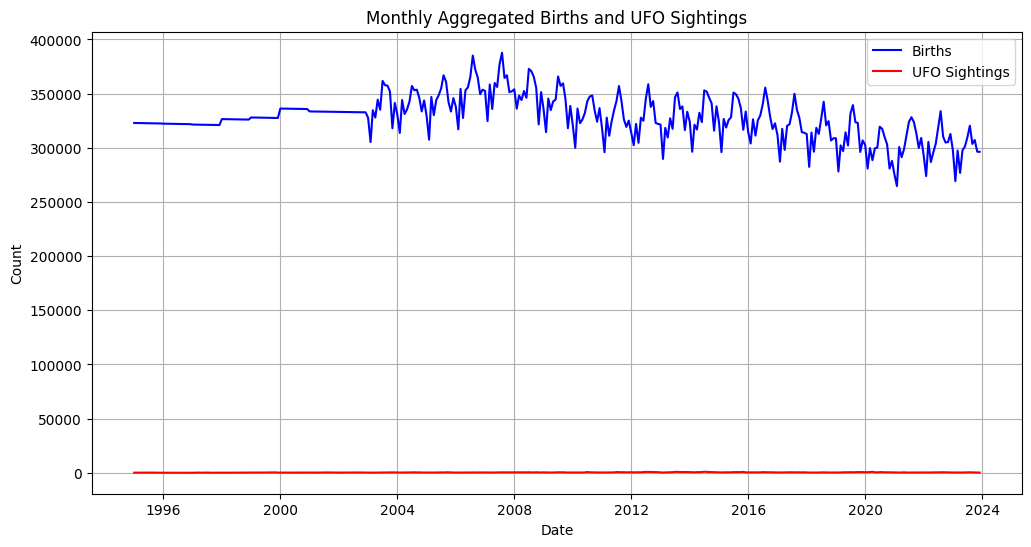

In [88]:

plt.figure(figsize=(12, 6))

# Births plot
plt.plot(monthly_births_time_series['date'], monthly_births_time_series['births'], label='Births', color='blue')

# UFO sightings plot
plt.plot(monthly_ufo_time_series['date'], monthly_ufo_time_series['sightings'], label='UFO Sightings', color='red')

# Add labels and legend
plt.title('Monthly Aggregated Births and UFO Sightings')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

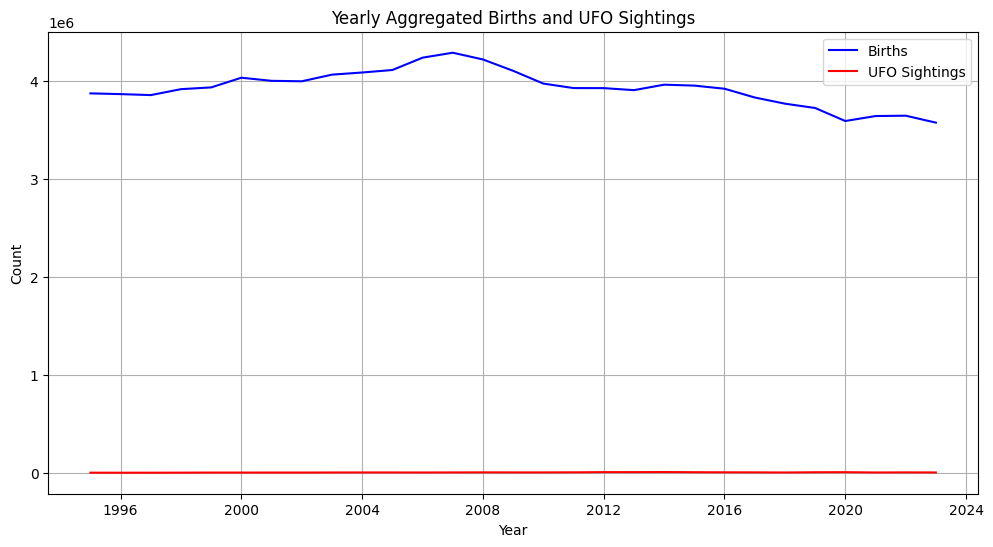

In [89]:
plt.figure(figsize=(12, 6))

# Births plot
plt.plot(yearly_births_time_series['date'], yearly_births_time_series['births'], label='Births', color='blue')

# UFO sightings plot
plt.plot(yearly_ufo_time_series['date'], yearly_ufo_time_series['sightings'], label='UFO Sightings', color='red')

# Add labels and legend
plt.title('Yearly Aggregated Births and UFO Sightings')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# The two charts do not provide relevant or at the very least insightful comparision of the two data sources. This is mainly due to the discrepency between the total sizes. 
# The births values are in the millions while the UFO data is only in the hundreds. This is what causes the UFO data to look like a flat line on the graph. 

# Go here to obtain the answers to all the project questions and analysis response. 
## [Last Step: Data Wrangling Project Starter File](data_wrangling_project_starter.ipynb)



---
#### [Return To Landing Page](order_of_operations_landing.ipynb)
